# Application of Benford's Law - Manual Coding
# (NVIDIA: Financial Statement)

Benford's Law is commonly used to briefly check for the presence of fraudulent accounting in financial statements of companies. For example, when Benford's Law is applied to the financial statements of Enron, known for its massive accounting fraud leading to bankruptcy, around the year 2000, anomaly can be easily observed.

NVIDIA, a leading manufacturer of graphics processing units (GPUs), has seen substantial economic expansion, spurred by breakthroughs in generative AI technology in 2023. Such growth is expected to be directly reflected in their financial statements, which has led me to pay particular attention to whether there could be any manipulation or errors in their reported financials, such as overstated growth.

While Python's "benfordlaw" library simplifies the process, one can also manually calculate Benford values to assess datasets. In this analysis, NVIDIA's financial statements for the second quarter of 2023 will be scrutinized by manually applying Benford's Law to identify any potential discrepancies indicative of fraud. The data is obtainable from below link.

https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-second-quarter-fiscal-2023

# 1. Generate Benford Values

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

# set up the environment for manual generation of benford values
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.linewidth'] = 2

In [145]:
import numpy as np

# generate the benford values
for d in range(1, 10):
  v = np.log10((d+1)/d)
  print('{:.4f}'.format(v))

0.3010
0.1761
0.1249
0.0969
0.0792
0.0669
0.0580
0.0512
0.0458


In [80]:
# put the values into a dictionary 'benford_values'
benford_values = {d:np.log10((d+1)/d) for d in range(1,10)}
benford_values

{1: 0.3010299956639812,
 2: 0.17609125905568124,
 3: 0.12493873660829993,
 4: 0.09691001300805642,
 5: 0.07918124604762482,
 6: 0.06694678963061322,
 7: 0.05799194697768673,
 8: 0.05115252244738129,
 9: 0.04575749056067514}

In [81]:
import pandas as pd

# using pandas library put the benford_values into a dataframe 'df'
df = pd.DataFrame({'benford': benford_values})
df

,benford
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


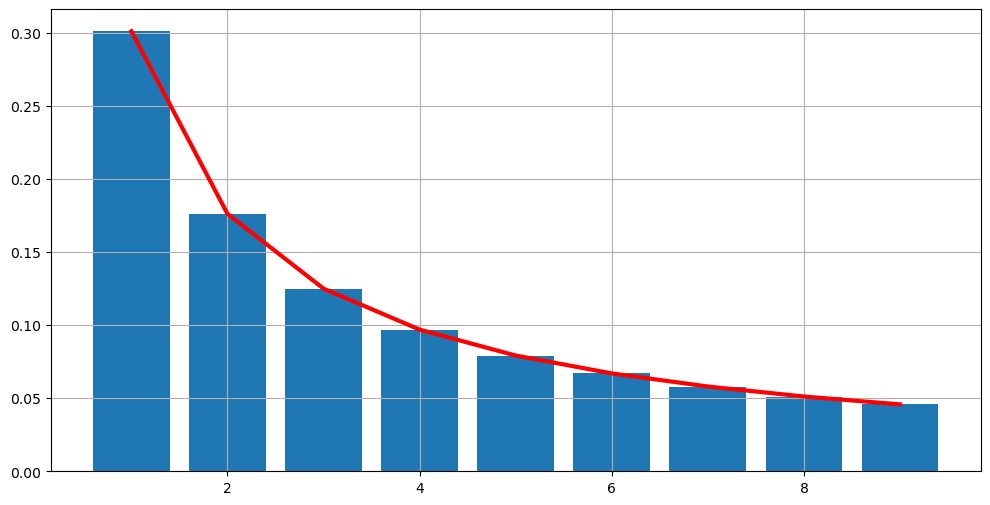

In [82]:
# visualize the benford values
plt.bar(range(1,10), df.benford)
plt.plot(range(1,10), df.benford, color='r',lw=3)

# 2. Import and Parse Financial Statement of NVDIA

In [ ]:
# import the package to read the html data
#!pip install html5lib
import html5lib
import pandas as pd

In [137]:
# bring the Financial Results data for Second Quarter Fiscal 2023 from NVDIA
url_nvidia = 'http://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-second-quarter-fiscal-2023'
df_list_nvidia = pd.read_html(url_nvidia)
len(df_list_nvidia)

7

In [97]:
# Balance Sheets
df_bs_nvidia = df_list_nvidia[3].astype(str)
df_bs_nvidia.iloc[:,[2, 5, 8]]

,2,5,8
0,nan,nan,nan
1,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION
2,CONDENSED CONSOLIDATED BALANCE SHEETS,CONDENSED CONSOLIDATED BALANCE SHEETS,CONDENSED CONSOLIDATED BALANCE SHEETS
3,(In millions),(In millions),(In millions)
4,(Unaudited),(Unaudited),(Unaudited)
5,nan,nan,nan
6,nan,nan,nan
7,nan,"July 31,","January 30,"
8,nan,2022,2022
9,ASSETS,nan,nan


In [96]:
# Income Statements
df_is_nvidia = df_list_nvidia[2].astype(str)
df_is_nvidia.iloc[:,[2,4,8,12,16]]

,2,4,8,12,16
0,nan,nan,nan,nan,nan
1,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION
2,CONDENSED CONSOLIDATED STATEMENTS OF INCOME,CONDENSED CONSOLIDATED STATEMENTS OF INCOME,CONDENSED CONSOLIDATED STATEMENTS OF INCOME,CONDENSED CONSOLIDATED STATEMENTS OF INCOME,CONDENSED CONSOLIDATED STATEMENTS OF INCOME
3,"(In millions, except per share data)","(In millions, except per share data)","(In millions, except per share data)","(In millions, except per share data)","(In millions, except per share data)"
4,(Unaudited),(Unaudited),(Unaudited),(Unaudited),(Unaudited)
5,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan
7,nan,Three Months Ended,Three Months Ended,Six Months Ended,Six Months Ended
8,nan,"July 31,","August 1,","July 31,","August 1,"
9,nan,2022,2021,2022,2021


In [114]:
# Cash Flows
# we will use this data
df_cf_nvidia = df_list_nvidia[4].astype(str)
df_cf_nvidia.iloc[:,[2, 4, 8, 12, 16]]

,2,4,8,12,16
0,nan,nan,nan,nan,nan
1,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION,NVIDIA CORPORATION
2,CONDENSED CONSOLIDATED STATEMENTS OF CASH FLOWS,CONDENSED CONSOLIDATED STATEMENTS OF CASH FLOWS,CONDENSED CONSOLIDATED STATEMENTS OF CASH FLOWS,CONDENSED CONSOLIDATED STATEMENTS OF CASH FLOWS,CONDENSED CONSOLIDATED STATEMENTS OF CASH FLOWS
3,(In millions),(In millions),(In millions),(In millions),(In millions)
4,(Unaudited),(Unaudited),(Unaudited),(Unaudited),(Unaudited)
5,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan
7,nan,Three Months Ended,Three Months Ended,Six Months Ended,Six Months Ended
8,nan,"July 31,","August 1,","July 31,","August 1,"
9,nan,2022,2021,2022,2021


In [115]:
import re

# scale the data frame of Cash Flows to remove unrelated numbers including the years and quarters
df_cf_nvidia = df_cf_nvidia[11:]
# replace all the types of data other than numeric([^0-9]) by '' empty values
df_cf_nvidia.replace('[^0-9]', '', regex=True).head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
11,,,,,,,,,,,,,,,,,,
12,,,,,656,,,,2374,,,,2274,,,,4285,
13,,,,,,,,,,,,,,,,,,
14,,,,,,,,,,,,,,,,,,
15,,,,,648,,,,465,,,,1226,,,,894,
16,,,,,378,,,,286,,,,712,,,,567,
17,,,,,7,,,,1,,,,24,,,,133,
18,,,,,443,,,,185,,,,985,,,,161,
19,,,,,,,,,,,,,1353,,,,,
20,,,,,5,,,,18,,,,18,,,,16,


In [116]:
# transfrom the 2-dimensional dataframe into 1-dimension by using reshape()
val_list_nvidia = df_cf_nvidia.replace('[^0-9]', '', regex=True).values.reshape(-1)
val_list_nvidia

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '656', '', '', '', '2374', '', '', '', '2274',
       '', '', '', '4285', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '648', '', '', '',
       '465', '', '', '', '1226', '', '', '', '894', '', '', '', '', '',
       '378', '', '', '', '286', '', '', '', '712', '', '', '', '567', '',
       '', '', '', '', '7', '', '', '', '1', '', '', '', '24', '', '', '',
       '133', '', '', '', '', '', '443', '', '', '', '185', '', '', '',
       '985', '', '', '', '161', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '1353', '', '', '', '', '', '', '', '', '', '5', '',
       '', '', '18', '', '', '', '18', '', '', '', '16', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '120', '', '', '', '563'

In [118]:
# extract the first digits of all numeric (non-empty) data
leading_digits_nvidia = [int(v[0]) for v in val_list_nvidia if v]

print(leading_digits_nvidia)

[6, 2, 2, 4, 6, 4, 1, 8, 3, 2, 7, 5, 7, 1, 2, 1, 4, 1, 9, 1, 1, 5, 1, 1, 1, 1, 5, 6, 1, 7, 1, 1, 2, 2, 1, 1, 1, 3, 2, 5, 2, 6, 1, 1, 1, 1, 5, 6, 9, 1, 2, 3, 4, 5, 2, 1, 5, 7, 3, 1, 7, 3, 4, 7, 9, 4, 1, 7, 4, 1, 4, 3, 5, 6, 3, 1, 2, 4, 3, 1, 2, 2, 1, 3, 5, 3, 3, 8, 8, 1, 1, 2, 1, 1, 2, 3, 4, 4, 4, 1, 1, 2, 3, 4, 6, 4, 8, 4, 1, 4, 3, 9, 1, 8, 3, 5, 3, 5]


In [123]:
# count the number of each digit using Counter()
counter_nvidia = collections.Counter(leading_digits_nvidia)
counter_nvidia

Counter({6: 7, 2: 16, 4: 16, 1: 36, 8: 5, 3: 16, 7: 7, 5: 11, 9: 4})

In [124]:
# get the ratio of each number of occurence to the total sum
total = sum(counter_nvidia.values())
finstat_ratio_nvidia = {i: counter_nvidia[i]/total for i in counter_nvidia.keys()}
finstat_ratio_nvidia

{6: 0.059322033898305086,
 2: 0.13559322033898305,
 4: 0.13559322033898305,
 1: 0.3050847457627119,
 8: 0.0423728813559322,
 3: 0.13559322033898305,
 7: 0.059322033898305086,
 5: 0.09322033898305085,
 9: 0.03389830508474576}

# 3. Apply Benford's Law to Cash Flow Data in Financial Statements

In [125]:
# put benford values and our NVIDIA data into one dataframe
df_ratio_nvidia = pd.DataFrame({
    'benford': benford_values,
    'finstat': finstat_ratio_nvidia
})

df_ratio_nvidia

,benford,finstat
1,0.301030,0.305085
2,0.176091,0.135593
3,0.124939,0.135593
4,0.096910,0.135593
5,0.079181,0.093220
6,0.066947,0.059322
7,0.057992,0.059322
8,0.051153,0.042373
9,0.045757,0.033898


<Axes: >

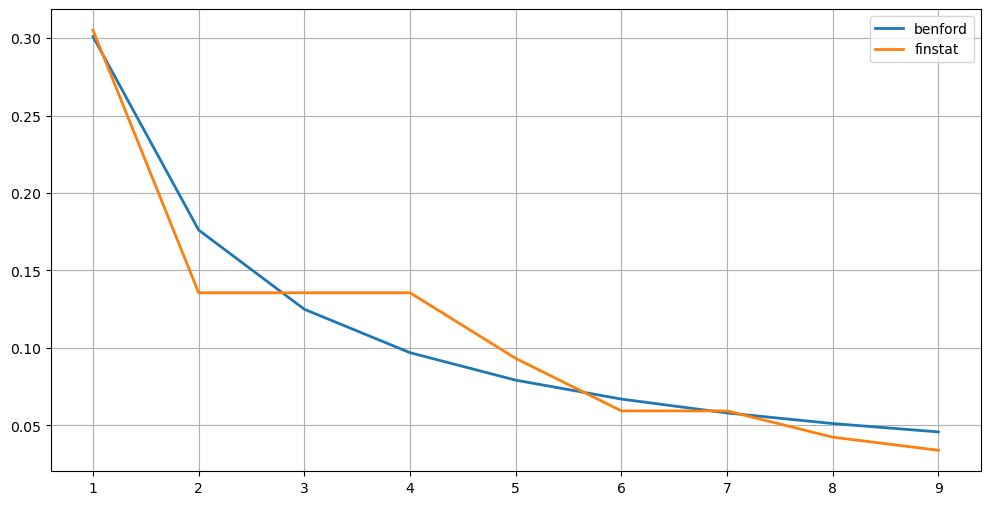

In [126]:
# visualize the 'df_ratio_nvidia'
df_ratio_nvidia.plot()

# 4. Compute Root Mean Square Error (RMSE)

In [128]:
# get the Root Mean Squared Error(RMSE) between the benford values and NVIDA data
rmse_nvidia = ((df_ratio_nvidia['finstat'] - df_ratio_nvidia['benford']) ** 2).mean() ** 0.5
rmse_nvidia

0.020388355147887834

In [129]:
# get the maximum value of the errors
np.abs(df_ratio_nvidia['finstat'] - df_ratio_nvidia['benford']).max()

0.04049803871669819

In [144]:
# we can also put the whole process above into two different functions
def benford(df_list, plot=True):
    val_list = []

    for df in df_list:
        df = df.astype(str)

    if any(x in df.to_html() for x in ['유동자산', '매출원가', '포괄손익', '현금흐름', '당기순이익']):
        values = df.replace('[^0-9]', '', regex=True).values.reshape(-1)
        val_list.extend(values)

    leading_digits = [int(v[0]) for v in val_list if v]

    counter = collections.Counter(leading_digits)

    total = sum(counter.values())
    finstat_ratio = {i: counter[i]/total for i in counter.keys()}

    benford_values =  {d:np.log10((d+1)/d) for d in range(1,10)}
    df_ratio = pd.DataFrame({
        'benford': benford_values,
        'finstat': finstat_ratio
    })
    if plot:
        df_ratio.plot()
    return df_ratio


def benford_desc(df_list):
    df = benford(df_list, plot=False)
    rmse = ((df['finstat'] - df['benford']) ** 2).mean() ** 0.5
    max_err = np.abs(df['finstat'] - df['benford']).max()
    return rmse, max_err

The analysis reveals that NVIDIA's Cash Flow data aligns with Benford's Law, indicating no significant deviations. Moreover, the Root Mean Square Error (RMSE) value, approximately 0.02, further corroborates the reliability of the financial statements, underscoring their accuracy.